In [4]:
import numpy as np
from matplotlib import pyplot as plt
from pandas import read_csv, DataFrame
from pynverse import inversefunc
from pathlib import Path
from scipy import interpolate
from scipy.optimize import fsolve

In [5]:
EXPDIR = Path.home()/'QUIC-Projects/summary_ipynb/2021/12 December/24 Fri/exp7'
plt.style.use('./styles/figstyle.mplstyle')
plt.style.reload_library()

In [6]:
from pandas import pivot_table
data = read_csv(EXPDIR/'data.csv')
table_amp = pivot_table(data, values='Amp', index='Error', columns='Size', aggfunc=['mean', 'std'])
error = table_amp['mean'].index
intf = interpolate.UnivariateSpline(np.log2(error), table_amp['mean'][64].to_numpy(), k=5)
inv = inversefunc(intf)

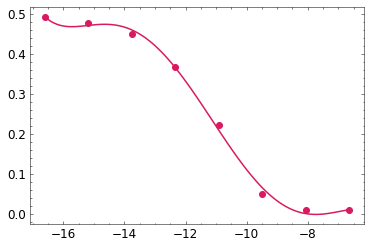

In [7]:
x = np.linspace(min(np.log2(error)), max(np.log2(error)), 100)
y = intf(x)
plt.plot(x, y)
plt.scatter(np.log2(error), table_amp['mean'][64].to_numpy())
#plt.xscale('log')

/home/quic/anaconda3/envs/qiskit/lib/python3.9/site-packages/pynverse/inverse.py:194: RuntimeWarning: Results obtained with less than 2 decimal digits of accuracy
  warnings.warn("Results obtained with less than %g "


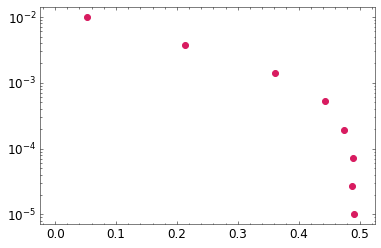

In [8]:
x = np.linspace(0, 0.5, 100)
y = inv(x)
plt.plot(x, y)
plt.scatter(table_amp['mean'][4].to_numpy(), error)
plt.yscale('log')

In [9]:
sizes = table_amp['mean'].columns
values = []
for size in sizes:
    df = table_amp['mean'][size]
    intf = interpolate.UnivariateSpline(df.index, df.to_numpy(), k=5)
    invval = inversefunc(intf, 1/2/np.e).item()
    values.append(invval)

<ipython-input-10-be2d66b25274>:3: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.xscale('log', basex=2)


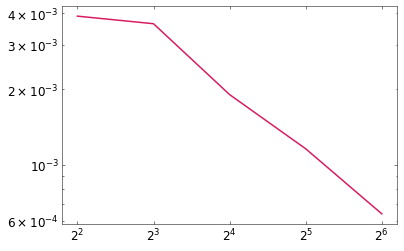

In [10]:
plt.plot(sizes, values)
plt.yscale('log')
plt.xscale('log', basex=2)

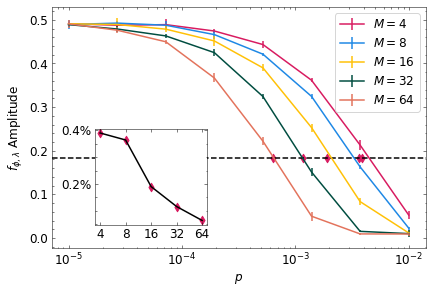

In [11]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

fig, ax = plt.subplots()
fig.tight_layout()
inset = inset_axes(ax, width="100%", height="100%",
                   bbox_to_anchor=(.1, .12, .3, .4),
                   bbox_transform=ax.transAxes,
                   loc=2)
for n in sizes:
    ax.errorbar(table_amp['mean'][n].index.to_numpy(),
                 table_amp['mean'][n].to_numpy(),
                 yerr=table_amp['std'][n].to_numpy(), label=f'$M={n}$')
ax.axhline(0.5/np.e, linestyle='--', color='k')
ax.set_xscale('log')
ax.set_xlabel(r'$p$')
ax.set_ylabel(r'$f_{\phi, \lambda}$ Amplitude')
ax.legend()
#ax.set_xlim([1e-5, None])

color_list = plt.rcParams['axes.prop_cycle'].by_key()['color']
inset.plot(sizes, np.asarray(values), '-k')
inset.scatter(sizes, np.asarray(values), marker='d')
ax.scatter(values, np.ones_like(values)*0.5/np.e, marker='d')
#inset.set_yscale('log')
inset.set_xscale('log', base=2)
#inset.set_xlabel(r'$M$')
#inset.set_ylabel(r'$p$')
inset.set_xticks(sizes)
inset.set_xticklabels(sizes)
inset.set_yticks([2e-3, 4e-3])
inset.set_yticklabels(['0.2%', '0.4%'])
fig.savefig('./figs/noiseanal/noiseanal.png', dpi=200)

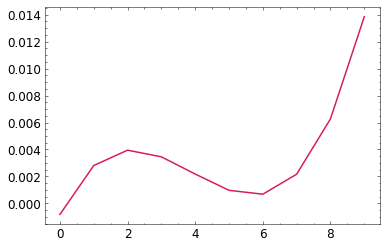

In [12]:
# polyfit = np.poly1d(np.polyfit(np.log2(list(sizes)), np.asarray(values), 2))
polyfit = interpolate.UnivariateSpline(np.log2(list(sizes)), np.asarray(values), s=0.5)
plt.plot(np.arange(0, 10), polyfit(np.arange(0, 10)))